This is an analysis of the results from 2019 elections for the head of the kibutzim movment in Israel.

Two candidates were up. Nir Meir (NM) and Lior Simcha (LS). Nir meir won with 55.72% of all votes.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 300)

# Data import and organization

In [8]:
#load original data
df = pd.read_excel('kibutz_primaries.xlsx', usecols=list(range(1,11)), header = 5)

#tranlsate features head to english
columnsHeads = ['kibutzName', 'potentialVoters', 'validVotes', 'invalidVotes', 'votingPercent', 'LS_Votes', 'LS_Percent',
               'NM_Votes', 'NM_Percent', 'isOK']
df.columns = columnsHeads

#save original index  -just in case
df['originalIndex'] = df.index

#feature for pvoting problems (only in one kibutz)
df['isOK'].fillna(True, inplace = True)

In [9]:
#drop missing raw - 26 is beit haaemek with voting problems
#257 - whats its stands for
df.drop([26, 257], inplace=True)


In [10]:
#make sure all is float -GeoViews require this step sometimes - so I do it for all features
df['potentialVoters'].astype(float)
df['validVotes'].astype(float)
df['invalidVotes'].astype(float)
df['LS_Votes'].astype(float)
df['LS_Percent'].astype(float)
df['NM_Votes'].astype(float)
df['NM_Percent'].astype(float);
df['votingPercent'].astype(float)

#Percent features
df['LS_Percent'] *= 100
df['NM_Percent'] *= 100
df['votingPercent'] *= 100

#str for nicer presentation in Bokeh
df['LS_PercentStr'] = df['LS_Percent'].astype(str).str[:5]+'%'
df['NM_PercentStr'] = df['NM_Percent'].astype(str).str[:5]+'%'
df['votingPercentStr'] = df['votingPercent'].astype(str).str[:5]+'%'



# Some numbers

The voting took place in 257 kibutzim (one was ommited)

In [11]:
len(df)

256

Lets see the total numbers:

In [12]:
totalVotes = df[['validVotes', 'invalidVotes', 'LS_Votes', 'NM_Votes' ]].sum(axis=0)
totalVotes


validVotes      19894.0
invalidVotes      119.0
LS_Votes         8803.0
NM_Votes        11084.0
dtype: float64

In [13]:
11084-8803

2281

In [14]:
19894+119

20013

So 20,2013 people voted, and  Nir Meir won by 2,281 votes

And percent-wise:
Bir Simcha won with 55.71% over 44.24%.
The invalid votes where 0.59% of all votes

In [15]:
totalVotes / (totalVotes['validVotes']) * 100

validVotes      100.000000
invalidVotes      0.598170
LS_Votes         44.249522
NM_Votes         55.715291
dtype: float64

In [16]:
44.2495-55.7152


-11.465700000000005

General voting percent:

In [17]:
((df['validVotes'] + df['invalidVotes']) / df['potentialVoters']).mean() * 100

35.26197236320747

### Features engineering

In [18]:
#calculate invalid votes as % from all votes
df['invalidVotesPercent'] = (df['invalidVotes'] / (df['validVotes'] + df['invalidVotes'])) * 100
df['invalidVotesPercentStr'] = df['invalidVotesPercent'].astype(str).str[:5]+'%'

In [19]:
#add winner feature

df.loc[df['NM_Percent'] >= 50, 'winner'] = 'Nir Meir'
df.loc[df['LS_Percent'] >= 50, 'winner'] = 'Lior Simcha'

In [20]:
#add supportScale - a -1 (LS) to 1 (NM) scale for the support of each one of the two candidates
df['supportScale'] = df['NM_Percent'] - df['LS_Percent']
df['supportScale'] /= 100
df['supportScale'] = df['supportScale'].astype(float)

#add herd score - how much are people singly minded toward a candidate (among voters only)
df['herdScale'] = df['supportScale'].abs()

In [21]:
#create color feature
df['winner_color'] = 'blue'
df.loc[df['winner'] == 'Nir Meir','winner_color'] = 'orange'

And some more statistics - NM won in 162 over 94 kibutzim


In [22]:
df['winner'].value_counts()

Nir Meir       162
Lior Simcha     94
Name: winner, dtype: int64

In [23]:
totalVotes

validVotes      19894.0
invalidVotes      119.0
LS_Votes         8803.0
NM_Votes        11084.0
dtype: float64

In [24]:
df.head()

,kibutzName,potentialVoters,validVotes,invalidVotes,votingPercent,LS_Votes,LS_Percent,NM_Votes,NM_Percent,isOK,originalIndex,LS_PercentStr,NM_PercentStr,votingPercentStr,invalidVotesPercent,invalidVotesPercentStr,winner,supportScale,herdScale,winner_color
0,אדמית,75.0,17.0,0.0,22.666667,4.0,23.5294,13.0,76.4706,True,0,23.52%,76.47%,22.66%,0.000000,0.0%,Nir Meir,0.529412,0.529412,orange
1,אור הנר,173.0,86.0,0.0,49.710983,16.0,18.6047,70.0,81.3953,True,1,18.60%,81.39%,49.71%,0.000000,0.0%,Nir Meir,0.627907,0.627907,orange
2,אורטל,126.0,13.0,0.0,10.317460,6.0,46.1538,7.0,53.8462,True,2,46.15%,53.84%,10.31%,0.000000,0.0%,Nir Meir,0.076923,0.076923,orange
3,אורים,169.0,63.0,0.0,37.278107,43.0,68.254,20.0,31.746,True,3,68.25%,31.74%,37.27%,0.000000,0.0%,Lior Simcha,-0.365079,0.365079,blue
4,אושה,241.0,60.0,1.0,24.896266,27.0,45,33.0,55,True,4,45.0%,55.00%,24.89%,1.639344,1.639%,Nir Meir,0.100000,0.100000,orange


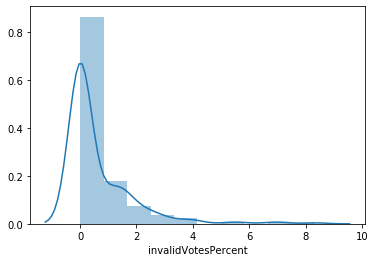

In [25]:
sns.distplot(df['invalidVotesPercent'], bins=10)

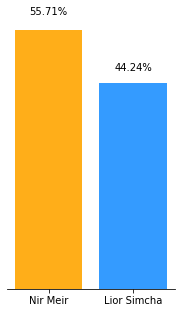

In [26]:
fig, ax = plt.subplots(figsize=[3,5])
totalVotes

y = [55.71, 44.24]
names = ['Nir Meir', 'Lior Simcha']
labels = ['55.71%', '44.24%']


bars = ax.bar(names, y, color=['orange', 'dodgerblue'], alpha=0.9)

for i, bar in enumerate(bars):

    x = bar.xy[0] + bar.get_width() *0.5
    y = bar.xy[1] + bar.get_height() *1.05
    ax.text(x,y, labels[i], ha='center', va='bottom')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_visible(False)

# plt.savefig(r'output\voting_bars.jpg', dpi = 900)

# Invalid votes analysis
I wanted to see if there are any abnormalities regarding invalid votes

In [27]:
#We can see that the maximal 
df['invalidVotesPercent'].describe()

count    256.000000
mean       0.638367
std        1.248482
min        0.000000
25%        0.000000
50%        0.000000
75%        1.044408
max        8.333333
Name: invalidVotesPercent, dtype: float64

In [28]:
192+64

256

### check the extreme values

In [29]:
print('Maximum invalid votes by %')
df[df['invalidVotesPercent'] == df['invalidVotesPercent'].max()]

Maximum invalid votes by %


,kibutzName,potentialVoters,validVotes,invalidVotes,votingPercent,LS_Votes,LS_Percent,NM_Votes,NM_Percent,isOK,originalIndex,LS_PercentStr,NM_PercentStr,votingPercentStr,invalidVotesPercent,invalidVotesPercentStr,winner,supportScale,herdScale,winner_color
136,מגוון,12.0,11.0,1.0,91.666667,8.0,72.7273,3.0,27.2727,True,136,72.72%,27.27%,91.66%,8.333333,8.333%,Lior Simcha,-0.454545,0.454545,blue


In [30]:
print('Maximum invalid votes in total')
df[df['invalidVotes'] == df['invalidVotes'].max()]

Maximum invalid votes in total


,kibutzName,potentialVoters,validVotes,invalidVotes,votingPercent,LS_Votes,LS_Percent,NM_Votes,NM_Percent,isOK,originalIndex,LS_PercentStr,NM_PercentStr,votingPercentStr,invalidVotesPercent,invalidVotesPercentStr,winner,supportScale,herdScale,winner_color
207,עין שמר,283.0,82.0,6.0,28.975265,70.0,85.3659,12.0,14.6341,True,207,85.36%,14.63%,28.97%,6.818182,6.818%,Lior Simcha,-0.707317,0.707317,blue


In [31]:
df.sort_values('invalidVotesPercent', ascending=False)

,kibutzName,potentialVoters,validVotes,invalidVotes,votingPercent,LS_Votes,LS_Percent,NM_Votes,NM_Percent,isOK,originalIndex,LS_PercentStr,NM_PercentStr,votingPercentStr,invalidVotesPercent,invalidVotesPercentStr,winner,supportScale,herdScale,winner_color
136,מגוון,12.0,11.0,1.0,91.666667,8.0,72.7273,3.0,27.2727,True,136,72.72%,27.27%,91.66%,8.333333,8.333%,Lior Simcha,-0.454545,0.454545,blue
217,צבעון,72.0,13.0,1.0,18.055556,7.0,53.8462,6.0,46.1538,True,217,53.84%,46.15%,18.05%,7.142857,7.142%,Lior Simcha,-0.076923,0.076923,blue
207,עין שמר,283.0,82.0,6.0,28.975265,70.0,85.3659,12.0,14.6341,True,207,85.36%,14.63%,28.97%,6.818182,6.818%,Lior Simcha,-0.707317,0.707317,blue
227,רגבה,282.0,50.0,3.0,17.730496,18.0,36,32.0,64,True,227,36.0%,64.0%,17.73%,5.660377,5.660%,Nir Meir,0.280000,0.280000,orange
161,משאבי שדה,164.0,53.0,3.0,32.317073,32.0,60.3774,21.0,39.6226,True,161,60.37%,39.62%,32.31%,5.357143,5.357%,Lior Simcha,-0.207547,0.207547,blue
79,העוגן,311.0,94.0,4.0,30.225080,23.0,24.4681,71.0,75.5319,True,79,24.46%,75.53%,30.22%,4.081633,4.081%,Nir Meir,0.510638,0.510638,orange
32,בית קשת,87.0,24.0,1.0,27.586207,4.0,16.6667,20.0,83.3333,True,32,16.66%,83.33%,27.58%,4.000000,4.0%,Nir Meir,0.666667,0.666667,orange
29,בית זרע,255.0,48.0,2.0,18.823529,18.0,37.5,30.0,62.5,True,29,37.5%,62.5%,18.82%,4.000000,4.0%,Nir Meir,0.250000,0.250000,orange
53,גלעד,242.0,51.0,2.0,21.074380,35.0,68.6275,16.0,31.3725,True,53,68.62%,31.37%,21.07%,3.773585,3.773%,Lior Simcha,-0.372549,0.372549,blue
11,אליפז,59.0,28.0,1.0,47.457627,5.0,17.8571,23.0,82.1429,True,11,17.85%,82.14%,47.45%,3.448276,3.448%,Nir Meir,0.642857,0.642857,orange


If we plot the invalid votes spreading by % ot in total, we can see that the numbers are not extreme:

[]

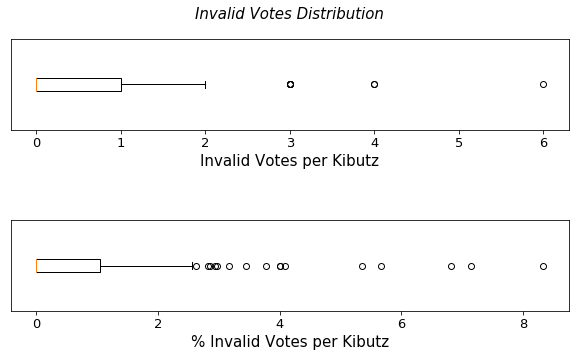

In [32]:
fig, ax = plt.subplots(2, 1, figsize = [10, 5])

sub_size=15
tick_size = 13

fig.subplots_adjust(hspace=1)

ax[0].boxplot(df['invalidVotes'], vert=False);
ax[0].set_title('Invalid Votes Distribution', fontsize=sub_size, style='italic' ,pad=20)

ax[0].set_xlabel('Invalid Votes per Kibutz', fontsize=sub_size)
ax[0].tick_params(axis = 'x',labelsize=tick_size )
ax[0].set_yticks([])

ax[1].boxplot(df['invalidVotesPercent'], vert=False);
ax[1].set_xlabel('% Invalid Votes per Kibutz', fontsize=sub_size)
ax[1].tick_params(axis = 'x',labelsize=tick_size )
ax[1].set_yticks([])

# plt.savefig(r'output\invalidBox')

We can see that in ~100% of the kibutzim there were 0-2 invalid votes. That's seems normal.
But I still wanted to checkthe extreme values.
For that I took the top 30 kibutzim, either by % or by total number of invalid votes, and scatter them:.


In [33]:
#######################################################
df['invalidVotesPercent'].describe().T

count    256.000000
mean       0.638367
std        1.248482
min        0.000000
25%        0.000000
50%        0.000000
75%        1.044408
max        8.333333
Name: invalidVotesPercent, dtype: float64

In [34]:
#generate a df of top invalid votes by % and in total
invalid1 = df.sort_values('invalidVotes', ascending=False).head(30)
invalid2 = df.sort_values('invalidVotesPercent', ascending=False).head(30)

top_inavlids = pd.merge(invalid1, invalid2, how='outer')



In [35]:
top_inavlids.head()

,kibutzName,potentialVoters,validVotes,invalidVotes,votingPercent,LS_Votes,LS_Percent,NM_Votes,NM_Percent,isOK,originalIndex,LS_PercentStr,NM_PercentStr,votingPercentStr,invalidVotesPercent,invalidVotesPercentStr,winner,supportScale,herdScale,winner_color
0,עין שמר,283.0,82.0,6.0,28.975265,70.0,85.365854,12.0,14.634146,True,207,85.36%,14.63%,28.97%,6.818182,6.818%,Lior Simcha,-0.707317,0.707317,blue
1,העוגן,311.0,94.0,4.0,30.225080,23.0,24.468085,71.0,75.531915,True,79,24.46%,75.53%,30.22%,4.081633,4.081%,Nir Meir,0.510638,0.510638,orange
2,יגור,835.0,303.0,4.0,36.287425,147.0,48.514851,156.0,51.485149,True,96,48.51%,51.48%,36.28%,1.302932,1.302%,Nir Meir,0.029703,0.029703,orange
3,משאבי שדה,164.0,53.0,3.0,32.317073,32.0,60.377358,21.0,39.622642,True,161,60.37%,39.62%,32.31%,5.357143,5.357%,Lior Simcha,-0.207547,0.207547,blue
4,רמת יוחנן,480.0,197.0,3.0,41.041667,80.0,40.609137,117.0,59.390863,True,234,40.60%,59.39%,41.04%,1.500000,1.5%,Nir Meir,0.187817,0.187817,orange


In [36]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool
from bokeh.models import Range1d


In [37]:
# create a new plot with default tools, using figure
output_notebook()
# output_file(r'output\invalids.html')

p = figure(plot_width=400, plot_height=400, match_aspect=True)
p.background_fill_color = "beige"
p.title.text = 'Invalid Votes: total number by %'
p.title.align = 'center'
p.title.text_font_size = '18pt'

#prepare date for ploting
src = ColumnDataSource(top_inavlids)

# add a circle renderer with x and y coordinates, size, color, and alpha
cr = p.circle('invalidVotes', 'invalidVotesPercent', source=src,
              size=20,
              fill_color='winner_color', hover_fill_color="firebrick",
              fill_alpha=0.3, hover_alpha=0.3,
              line_color=None, hover_line_color="black")


hover = HoverTool(tooltips=[('Kibutz name: ', '@kibutzName'),
                              ('Valid Votes' , '@validVotes'),
                              ('Invalid Votes', '@invalidVotes'),
                              ('Invalid Votes %', '@invalidVotesPercentStr'),
                              ('Local Winner', '@winner')], renderers=[cr], mode='mouse')

p.add_tools(hover)




#arange axes
p.x_range = Range1d(0, 9)

# change just some things about the x-axes
p.xaxis.axis_label = "Invalid Votes"
p.xaxis.axis_line_width = 3

# change just some things about the y-axes
p.yaxis.axis_label = "Invalid Votes %"



show(p) # show the results

# from bokeh.resources import CDN
# from bokeh.embed import file_html
# html_str = file_html(p, CDN, "my plot")

# file = open('percent.html', 'w')
# file.write(html_str)
# file.close()


Loading BokehJS ...

We expect abnormal points to be in the top right corner - meaning they are high percentage, but not because of low voting rate. I didn't check anything statistically, but to me it looks relatively reasonable. It also doesn't seems to corelate with the winner in that kibutz.

# Voting Percent analysis
in each kibutz, how much of potential voters actually voted

In [38]:
#arrange data by voting percent
df_by_votingPercent = df.sort_values(by = 'votingPercent', ascending=False)
df_by_votingPercent.index = np.arange(len(df_by_votingPercent))
df_by_votingPercent.head(5)

,kibutzName,potentialVoters,validVotes,invalidVotes,votingPercent,LS_Votes,LS_Percent,NM_Votes,NM_Percent,isOK,originalIndex,LS_PercentStr,NM_PercentStr,votingPercentStr,invalidVotesPercent,invalidVotesPercentStr,winner,supportScale,herdScale,winner_color
0,נערן,63.0,59.0,0.0,93.650794,59.0,100,0.0,0,True,188,100%,0%,93.65%,0.000000,0.0%,Lior Simcha,-1.000000,1.000000,blue
1,מגוון,12.0,11.0,1.0,91.666667,8.0,72.7273,3.0,27.2727,True,136,72.72%,27.27%,91.66%,8.333333,8.333%,Lior Simcha,-0.454545,0.454545,blue
2,אשבל,75.0,67.0,0.0,89.333333,67.0,100,0.0,0,True,20,100%,0%,89.33%,0.000000,0.0%,Lior Simcha,-1.000000,1.000000,blue
3,רביד,108.0,92.0,0.0,85.185185,92.0,100,0.0,0,True,226,100%,0%,85.18%,0.000000,0.0%,Lior Simcha,-1.000000,1.000000,blue
4,נצר סירני,437.0,321.0,2.0,73.455378,272.0,84.7352,49.0,15.2648,True,189,84.73%,15.26%,73.45%,0.619195,0.619%,Lior Simcha,-0.694704,0.694704,blue


### minimal voting % - Harduf with 23/231  voters ~10% voting

In [39]:
df_by_votingPercent.tail(5)[['kibutzName', 'potentialVoters', 'validVotes', 'votingPercent']]

,kibutzName,potentialVoters,validVotes,votingPercent
251,כישור,104.0,13.0,12.500000
252,יסעור,324.0,37.0,11.419753
253,הבונים,138.0,15.0,10.869565
254,אורטל,126.0,13.0,10.317460
255,הרדוף,231.0,23.0,9.956710


### maximal voting % - Naaran with 93.6% voting 59/63 voters.

In [40]:
df_by_votingPercent.head(5)[['kibutzName', 'potentialVoters', 'validVotes', 'votingPercent']]

,kibutzName,potentialVoters,validVotes,votingPercent
0,נערן,63.0,59.0,93.650794
1,מגוון,12.0,11.0,91.666667
2,אשבל,75.0,67.0,89.333333
3,רביד,108.0,92.0,85.185185
4,נצר סירני,437.0,321.0,73.455378


### Voting % in each kibutz
now lets check the voting % in each kibutz

"\nplt.savefig(r'output\x0boting_dist.png', dpi=300)\n"

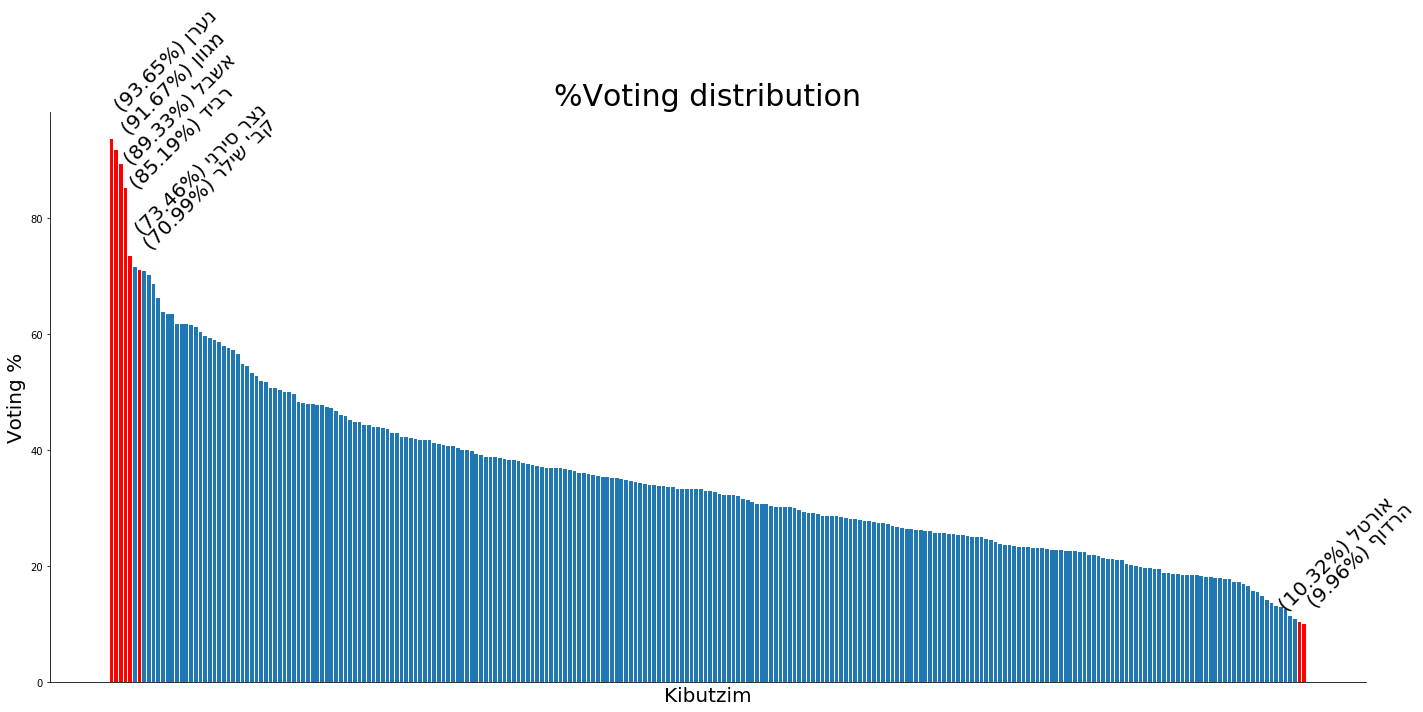

In [41]:
fig, ax = plt.subplots(figsize = [20, 10])

x = list(range((len(df_by_votingPercent['votingPercent']))))
y = df_by_votingPercent['votingPercent']
mean_vote_percent = df_by_votingPercent['votingPercent'].mean()*100

ax.bar(x, y)
ax.set_xlabel('Kibutzim', fontsize = 20)
ax.set_ylabel('Voting %', fontsize = 20)

def annotateBar(name, ax, offSetX = 1.05, offSetY = 1.05):
    name_idx = df_by_votingPercent[df_by_votingPercent['kibutzName'] == name].index[0]
    name_x = x[name_idx]
    name_y = y[name_idx]
    ax.bar(name_x, name_y, color = 'r')
    t_name = '({0:.2f}%) {1}'.format(name_y, name[::-1])
    ax.text(name_x * offSetX ,name_y * offSetY, t_name, fontsize = 20, rotation = 45)


#annotate
annotateBar('נערן', ax, 1, 1.05 )
annotateBar("מגוון", ax, 1.5, 1.03)
annotateBar('אשבל', ax, 1, 1)

annotateBar("רביד", ax, 1.1, 1)
annotateBar('אורטל', ax, 0.98, 1.2)
annotateBar('נצר סירני', ax)
annotateBar("קב' שילר", ax)
annotateBar('הרדוף', ax, 1, 1.3)



ax.set_title('%Voting distribution', fontsize = 30)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xticks([])

plt.tight_layout()
'''
plt.savefig(r'output\voting_dist.png', dpi=300)
'''

# Make the histogram interactive using Bokeh
based on the great tutorial at https://towardsdatascience.com/data-visualization-with-bokeh-in-python-part-one-getting-started-a11655a467d4

In [42]:
from bokeh.plotting import figure

from bokeh.io import show, output_notebook, output_file, reset_output
from bokeh.models import ColumnDataSource, HoverTool, CategoricalColorMapper
from bokeh.palettes import Category10_5, Category20_16

from bokeh.models import ColumnDataSource
from bokeh.models.widgets import Select

In [43]:
#grab the data relevant for this plot
votingPercent = df[['kibutzName', 'votingPercent', 'votingPercentStr', 'NM_Percent', 'LS_Percent', 'winner', 'validVotes', 'potentialVoters']].copy()
votingPercent['votingPercent'] = votingPercent['votingPercent'].astype(int)
votingPercent['NM_Percent'] = votingPercent['NM_Percent'].astype(int)
votingPercent['LS_Percent'] = votingPercent['LS_Percent'].astype(int)
votingPercent['LS_Percent']
votingPercent.sort_values('NM_Percent', ascending=False,inplace=True)

#create a ColumnDataSource - a DataFrame like object for the bokeh to handle
edges = np.arange(len(votingPercent) + 1)
votingPercent['left'] = edges[:-1]
votingPercent['right'] = edges[1:]
src = ColumnDataSource(votingPercent)

In [44]:
def style(p):
    p.title.align = 'center'
    p.title.text_font_size = '14pt'
    p.xaxis.axis_label_text_font_size = '10pt'
    p.xaxis.major_label_text_font_size = '8pt'
    p.yaxis.axis_label_text_font_size = '10pt'
    p.yaxis.major_label_text_font_size = '8pt'
    return p


In [45]:
#Sort the data to distribute nicely when ploted
votingPercent.sort_values('votingPercent', ascending=False,inplace=True)

#create a ColumnDataSource - a DataFrame like object for the bokeh to handle
edges = np.arange(len(votingPercent) + 1)
votingPercent['left'] = edges[:-1]
votingPercent['right'] = edges[1:]
src = ColumnDataSource(votingPercent)


reset_output()
# output_file(r'output\voting%.html')
output_notebook()

#generate figure
p2 = figure(plot_height = 400, plot_width = 600, 
           title = 'Local Voting %',
          x_axis_label = 'Kibutzim', 
           y_axis_label = 'Voting %')

    
# # Add a quad glyph with source this time
p2.quad(bottom=0, top='votingPercent', left='left', right='right', source=src,
       fill_color='blue', line_color='grey', fill_alpha = 0.3,
       hover_fill_alpha = 1.0, hover_fill_color = 'red')

# Add a hover tool referring to the formatted columns
hover = HoverTool(tooltips = [('Kibutz name: ', '@kibutzName'),
                              ('Valid Votes' , '@validVotes'),
                              ('Potential Voters', '@potentialVoters' ),
                              ('Voting %', '@votingPercentStr'),
                              ('Local Winner', '@winner')], show_arrow=True)

# Add the hover tool to the graph
p2.add_tools(hover)

p2 = style(p2)

show(p2)

Loading BokehJS ...

# voting fot spesific candidates
Check which of the kibutzim are supportive for one candidate

In [46]:
#Kibutzim with >95% voting for one cendidate

In [47]:
df_by_votingPercent[df_by_votingPercent['LS_Percent'] > 95]

,kibutzName,potentialVoters,validVotes,invalidVotes,votingPercent,LS_Votes,LS_Percent,NM_Votes,NM_Percent,isOK,originalIndex,LS_PercentStr,NM_PercentStr,votingPercentStr,invalidVotesPercent,invalidVotesPercentStr,winner,supportScale,herdScale,winner_color
0,נערן,63.0,59.0,0.0,93.650794,59.0,100,0.0,0,True,188,100%,0%,93.65%,0.0,0.0%,Lior Simcha,-1.0,1.0,blue
2,אשבל,75.0,67.0,0.0,89.333333,67.0,100,0.0,0,True,20,100%,0%,89.33%,0.0,0.0%,Lior Simcha,-1.0,1.0,blue
3,רביד,108.0,92.0,0.0,85.185185,92.0,100,0.0,0,True,226,100%,0%,85.18%,0.0,0.0%,Lior Simcha,-1.0,1.0,blue


In [48]:
df_by_votingPercent[df_by_votingPercent['NM_Percent'] > 95]

,kibutzName,potentialVoters,validVotes,invalidVotes,votingPercent,LS_Votes,LS_Percent,NM_Votes,NM_Percent,isOK,originalIndex,LS_PercentStr,NM_PercentStr,votingPercentStr,invalidVotesPercent,invalidVotesPercentStr,winner,supportScale,herdScale,winner_color
7,גילגל,55.0,39.0,1.0,70.909091,0.0,0,39.0,100,True,50,0%,100%,70.90%,2.500000,2.5%,Nir Meir,1.000000,1.000000,orange
9,קליה,83.0,57.0,1.0,68.674699,1.0,1.75439,56.0,98.2456,True,221,1.754%,98.24%,68.67%,1.724138,1.724%,Nir Meir,0.964912,0.964912,orange
10,ייט'ב,62.0,41.0,1.0,66.129032,1.0,2.43902,40.0,97.561,True,103,2.439%,97.56%,66.12%,2.380952,2.380%,Nir Meir,0.951220,0.951220,orange
15,שומריה,149.0,92.0,0.0,61.744966,0.0,0,92.0,100,True,256,0%,100%,61.74%,0.000000,0.0%,Nir Meir,1.000000,1.000000,orange
18,יהל,54.0,33.0,0.0,61.111111,0.0,0,33.0,100,True,98,0%,100%,61.11%,0.000000,0.0%,Nir Meir,1.000000,1.000000,orange
22,נווה חריף,61.0,36.0,0.0,59.016393,0.0,0,36.0,100,True,174,0%,100%,59.01%,0.000000,0.0%,Nir Meir,1.000000,1.000000,orange
55,בית הערבה,52.0,23.0,0.0,44.230769,0.0,0,23.0,100,True,27,0%,100%,44.23%,0.000000,0.0%,Nir Meir,1.000000,1.000000,orange
57,בחן,91.0,40.0,1.0,43.956044,1.0,2.5,39.0,97.5,True,22,2.5%,97.5%,43.95%,2.439024,2.439%,Nir Meir,0.950000,0.950000,orange
79,כפר גליקסון,151.0,59.0,0.0,39.072848,0.0,0,59.0,100,True,114,0%,100%,39.07%,0.000000,0.0%,Nir Meir,1.000000,1.000000,orange
170,חנתון,144.0,38.0,0.0,26.388889,1.0,2.63158,37.0,97.3684,True,90,2.631%,97.36%,26.38%,0.000000,0.0%,Nir Meir,0.947368,0.947368,orange


## Voting to each candidate by Percent of total voters
for each kibutz, illustrate how the votes were distributed

In [49]:
#sort the data again
df_by_candidate = df.sort_values('LS_Percent')
df_by_candidate.index = np.arange(len(df_by_candidate))

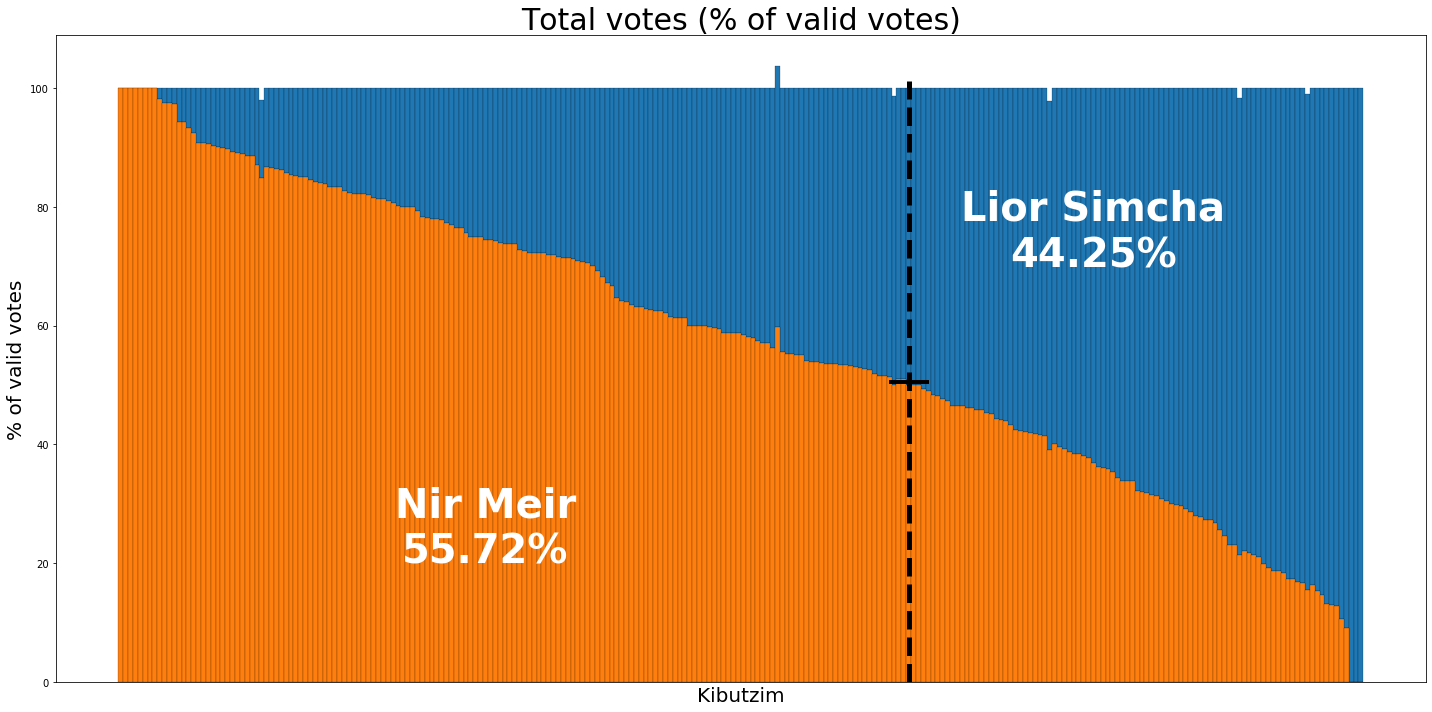

In [50]:
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize = [20, 10])

x = np.arange(len(df_by_candidate))
yLS = df_by_candidate['LS_Percent'] 
yNM =  df_by_candidate['NM_Percent']

width = 1
#plot both plots
ax.bar(x, yLS,bottom=yNM, label = 'Lior Simcha', width=width, edgecolor='k', linewidth = 0.2)
ax.bar(x, yNM, label = 'Nir Meir', width=width, edgecolor='k', linewidth = 0.2 )

#annotate with candidates name
ax.text(200, 70, 'Lior Simcha\n44.25%', color='white', fontsize=40, horizontalalignment='center', weight='bold')
ax.text(75, 20, 'Nir Meir\n55.72%', color='white', fontsize=40, horizontalalignment='center', weight='bold')

#plot lines
ax.axvline(162, color='k', linestyle='--', ymax=0.93, lw=5)
ax.text(158, 52, '__', color='k', fontsize=40, weight='bold')

ax.set_xlabel('Kibutzim', fontsize=20)
ax.set_ylabel('% of valid votes', fontsize=20)
ax.set_title('Total votes (% of valid votes)', fontsize = 30)

ax.set_xticks([])

plt.tight_layout()
#plt.savefig(r'output\total_votes.png', dpi=300)

Now lets make the above plot interactive

In [51]:
from bokeh.models import ColumnDataSource, Plot, LinearAxis, Grid
from bokeh.models.glyphs import Text
from bokeh.io import curdoc, show, reset_output, output_notebook, output_file

#grab the data relevant for this plot
votingPercent = df[['kibutzName', 'votingPercent', 'votingPercentStr', 'NM_Percent', 'NM_PercentStr', 'LS_Percent', 'LS_PercentStr', 'winner', 'validVotes', 'potentialVoters']].copy()
votingPercent['votingPercent'] = votingPercent['votingPercent'].astype(int)
votingPercent['NM_Percent'] = votingPercent['NM_Percent'].astype(int)
votingPercent['LS_Percent'] = votingPercent['LS_Percent'].astype(int)
votingPercent['LS_Percent']
votingPercent.sort_values('NM_Percent', ascending=False,inplace=True)

#create a ColumnDataSource - a DataFrame like object for the bokeh to handle
edges = np.arange(len(votingPercent) + 1)
votingPercent['left'] = edges[:-1]
votingPercent['right'] = edges[1:]
src = ColumnDataSource(votingPercent)

reset_output()

# output_file(r'output\LS_NM_ratio.html')
output_notebook()


p3 = figure(plot_height = 400, plot_width = 600, 
           title = 'התפלגות הצבעה בתוך קיבוצים',
           x_axis_label = 'קיבוצים', 
           y_axis_label = '%')
p3.title.align='center'

# # LS

NM = p3.quad(bottom='NM_Percent', top=100, left='left', right='right', source=src,
       fill_color='blue', line_color='black', fill_alpha = 0.5,
       hover_fill_alpha = 1.0, hover_fill_color = 'red',
       line_width = 0.1)    
# NM
# Add a quad glyph with source this time
LS = p3.quad(bottom=0, top='NM_Percent', left='left', right='right', source=src,
       fill_color='orange', line_color='black', fill_alpha = 1,
       hover_fill_alpha = 1.0, hover_fill_color = 'red', line_width = 0.1)

#add points showing voting % in each kibutz
# VP = p3.circle(np.arange(0.5,256.5), votingPercent['votingPercent'], size=5, color='black', alpha=0.2)
    
    




# Add a hover tool referring to the formatted columns
hoverNM = HoverTool(tooltips = [('Kibutz name: ', '@kibutzName'),
                              ('Voting %', '@votingPercentStr'),
                              ('Local Winner', '@winner'),
                              ('Nir Meir %', '@NM_PercentStr'),
                              ('Lior Simcha %', '@LS_PercentStr')],
                               renderers=[NM], mode='vline')
hoverLS = HoverTool(tooltips=None, renderers=[LS], mode='vline')

# Add the hover tool to the graph
p3.add_tools(hoverNM, hoverLS)

#Annotate
x = np.array([50, 130])
y = np.array([35, 70])
text = ['Nir Meir 55.72%', 'Lior Simcha 47.25%']
source2 = ColumnDataSource(dict(x=x, y=y, text=text))

glyph = Text(x="x", y="y", text="text", text_color="white", text_font_style='bold', text_font_size='18pt')
p3.add_glyph(source2, glyph)


output_file(r'output\LS_MN_ratio.html')

# p3 = style(p3)
show(p3)



Loading BokehJS ...

# check voting% vs herd_score correlation

In [52]:
#split data based on winner
df_NM = df[df['winner'] == 'Nir Meir']
df_NM['validVotesNorm'] = df_NM['validVotes'] ** 0.7

df_LS = df[df['winner'] == 'Lior Simcha']
df_LS['validVotesNorm'] = df_LS['validVotes'] ** 0.7




C:\Users\Ofir\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ofir\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [53]:
from bokeh.palettes import Spectral4

src_NM = ColumnDataSource(df_NM)
src_LS = ColumnDataSource(df_LS)


p = figure(plot_height = 500, plot_width = 500, tools="pan,box_zoom,reset,save")
p.title.text = 'Herd scale by voting %'
p.title.text_font_size = '18pt'
alpha = 0.5
NM = p.circle(x='votingPercent', y='herdScale', source=src_NM, color='orange', alpha=alpha, legend_label='Nir Meir', 
              size='validVotesNorm')
LS = p.circle(x='votingPercent', y='herdScale', source=src_LS, color='blue', alpha=alpha, legend_label='Lior Simcha',
             size='validVotesNorm')

p.legend.location = "bottom_right"
p.legend.click_policy="hide"



# Add a hover tool referring to the formatted columns
hoverNM = HoverTool(tooltips = [('Kibutz name', '@kibutzName'),
                                ('Valid votes', '@validVotes'),
                               ('Nir Meir votes', '@NM_Votes'),
                               ('Lior Simcha votes', '@LS_Votes')],
                                renderers=[NM], mode='mouse')

hoverLS = HoverTool(tooltips = [('Kibutz name: ', '@kibutzName'),
                                ('Valid votes:', '@validVotes'),
                                ('Nir Meir votes', '@NM_Votes'),
                               ('Lior Simcha votes', '@LS_Votes')],
                                renderers=[LS], mode='mouse')

p.add_tools(hoverNM, hoverLS)


p.title.align = 'center'
p.title.text_font_size = '14pt'
p.xaxis.axis_label = 'Voting %'
p.xaxis.axis_label_text_font_size = '10pt'
p.xaxis.major_label_text_font_size = '8pt'


p.yaxis.axis_label = 'Homogenuity Scale'
p.yaxis.axis_label_text_font_size = '10pt'
p.yaxis.major_label_text_font_size = '8pt'

p.x_range=Range1d(0, 100)
p.y_range=Range1d(-0.1, 1.1)

#output & show
reset_output()
output_notebook
# output_file("output\herdScale by voting%.html", title="herdScale by voting %")

show(p)


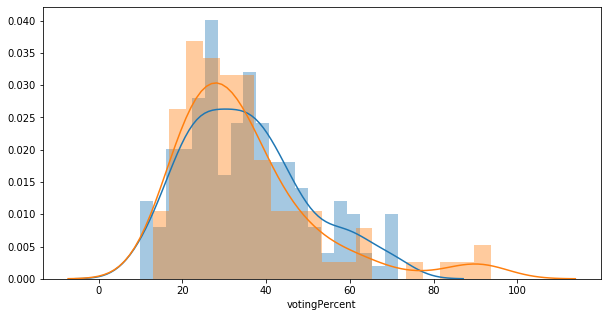

In [54]:
fig, ax = plt.subplots(figsize=[10, 5])
x, y = np.histogram(df_NM['votingPercent'], bins=30)
sns.distplot(df_NM['votingPercent'], bins = 20, ax=ax, norm_hist=3)
sns.distplot(df_LS['votingPercent'], bins = 20, ax=ax)
# sns.barplot(x=x, y=y[1:], ax=ax)
# ax.x

# Illustrate voting trends on map 
Illustrate the results using GeoViews and Bokeh.
I based it on the grat tutorial at This is based on the ariports tutorial at: https://towardsdatascience.com/how-to-visualize-data-on-top-of-a-map-in-python-using-the-geoviews-library-c4f444ca2929.

In [55]:
#read table with the wgs coordinats of each kibutz (see the get_wgs notebook for how it was made)
wgs = pd.read_csv('kibutzim_WGS.csv', index_col = 0)

In [56]:
wgs.head()

,code,population,lat,long,name.1,Unnamed: 6,Unnamed: 7
name,,,,,,,
אדמית,1068.0,209.0,33.078842,35.209510,אדמית,NaN,NaN
אור הנר,67.0,754.0,31.556197,34.602305,אור הנר,NaN,NaN
אורטל,4013.0,343.0,33.086236,35.758661,אורטל,NaN,NaN
אורים,403.0,493.0,31.304094,34.524868,אורים,NaN,NaN
אושה,278.0,492.0,32.796458,35.114584,אושה,NaN,NaN


In [57]:
#as index and order is identical in both tables, add the latitude and longitude coordinates
df['lat'] = wgs.loc[df['kibutzName'],:]['lat'].values
df['long'] = wgs.loc[list(df['kibutzName'])]['long'].values

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
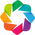

In [58]:
import holoviews as hv
import geoviews as gv
import geoviews.tile_sources as gvts
from geoviews import dim, opts
gv.extension('bokeh')



In [59]:
#Add fake north/south points to shape initial zoom

# print(df['lat'].min())
# print(df['lat'].max())
# print(df['long'].min())
# print(df['long'].max())

d = {'lat': [29.5, 33.5], 'long': [35, 35], 'kibutzName' : ['fakePoint', 'fakePoint'], 'winner' : ['Nir Meir', 'Nir Meir'], 'winner_color' : ['white', 'white']}
fake_points = pd.DataFrame(data=d)

df2 = df.copy()
df2 = df2.append(fake_points, ignore_index=True, sort=False)
df2.fillna(0, inplace=True)

df2['LS_Percent'] = df2['LS_Percent'].astype(int)
df2['NM_Percent'] = df2['NM_Percent'].astype(int)
df2['votingPercent'] = df2['votingPercent'].astype(int)
df2['NM_PercentStr'] = df2['NM_PercentStr'].astype(str)
df2['LS_PercentStr'] = df2['LS_PercentStr'].astype(str)

df2.tail()

,kibutzName,potentialVoters,validVotes,invalidVotes,votingPercent,LS_Votes,LS_Percent,NM_Votes,NM_Percent,isOK,...,NM_PercentStr,votingPercentStr,invalidVotesPercent,invalidVotesPercentStr,winner,supportScale,herdScale,winner_color,lat,long
253,תל יצחק,163.0,30.0,0.0,18,9.0,30,21.0,70,True,...,70.0%,18.40%,0.0,0.0%,Nir Meir,0.40000,0.40000,orange,32.252745,34.872378
254,תל קציר,165.0,67.0,0.0,40,27.0,40,40.0,59,True,...,59.70%,40.60%,0.0,0.0%,Nir Meir,0.19403,0.19403,orange,32.706396,35.617860
255,שומריה,149.0,92.0,0.0,61,0.0,0,92.0,100,True,...,100%,61.74%,0.0,0.0%,Nir Meir,1.00000,1.00000,orange,31.432154,34.884095
256,fakePoint,0.0,0.0,0.0,0,0.0,0,0.0,0,0,...,0,0,0.0,0,Nir Meir,0.00000,0.00000,white,29.500000,35.000000
257,fakePoint,0.0,0.0,0.0,0,0.0,0,0.0,0,0,...,0,0,0.0,0,Nir Meir,0.00000,0.00000,white,33.500000,35.000000


In [61]:
from bokeh.models import HoverTool


points = gv.Points(df2, ['long', 'lat'], ['kibutzName', 'validVotes', 'invalidVotes',
                                          'votingPercent', 'LS_Percent', 
                                          'NM_Percent', 'NM_PercentStr', 'LS_PercentStr',
                                          'herdScale', 'supportScale', 'winner', 'winner_color'])

hover = HoverTool(tooltips = [('name', '@kibutzName'),
                             ('Valid Votes', '@validVotes'),
                             ('Invalid Votes', '@invalidVotes'),
                             ('Nir Meir %',    '@NM_PercentStr'),
                             ('Lior Simcha %', '@LS_PercentStr'),
                             ('winner'      , '@winner')])
#hebrew hover
# hover = HoverTool(tooltips = [('שם', '@kibutzName'),
#                              ('סכהכ קולות תקינים', '@validVotes'),
#                              ('סכהכ קולות פסולים', '@invalidVotes'),
#                              ('ניר מאיר %',    '@NM_Percent'),
#                              ('ליאור שמחה %', '@LS_Percent'),
#                              ('מנצח בקלפי זו'      , '@winner')])


tiles = gv.tile_sources.CartoLight()
plot = (tiles * points).opts(opts.Points(width=900,height=900,
                                                   xaxis=None,yaxis=None,
                                                   show_grid=False,
                                                   alpha=dim('herdScale')**1.5,
                                                   size=dim('validVotes')**0.6,
                                                   color='winner_color',
                                                   cmap='bwr',
                                                   line_color = 'grey',
                                                   hover_line_color='red',
                                                   hover_line_alpha=1,
                                                   tools=[hover],
                                                   colorbar=False,
                                                   colorbar_position='bottom',
                                                   title="Kibutzim 2019 Election Results ",
                                                                                                 ))


# plot.circle(5,5)



#Annotate
# gv.save(plot, r'output\winnersMapLarge.html')
plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [long,lat]   (kibutzName,validVotes,invalidVotes,votingPercent,LS_Percent,NM_Percent,NM_PercentStr,LS_PercentStr,herdScale,supportScale,winner,winner_color)